# Decision Trees (1/16)

**Learning Objectives:**

-	Apply the tool of decisions trees to analyze a given decision. (Model)
-	Input parameters in a decision tree and solve by backward induction. (Analyze)
-	Examine the assumptions involved in an application of decision trees. (Model)
-	Communicate the result of the decision tree analysis to a business audience. (Communicate)

** Pre-class Readings:**

- DMD Chapters 1.1-1.6, 2.3
- Graphic Corporation case in DMD 2.14

When going through the chapters, pay attention to the following concepts:

- Node and branches (1.1)
- Event and decision nodes (1.1)
- Valuing the final branches (1.1)
- Assigning probabilities (1.1 and 2.3)
- Solving by backwards induction (1.1)
- Sensitivity analysis (1.1)

Make sure also that you understand the example trees used to analyze Bill's offer acceptance decision (1.1), Bio-imaging's investment decision (1.3), and the Suds-away market survey and production decision.

**The two most difficult part of applying decision trees is constructing the right tree, with nodes in the correct order, and calculating for each event node the correct probabilities, which requires conditioning on all the information that is known at that node. Here are some pointers for each task.**

## Constructing the Tree

- When constructing the decision tree, first focus on "what one can do" rather than "what one should do." One should list all the possible actions at each step, and not limit any potential branches because we suspect it will not be a good idea. For example, in the Graphic Corporation case (see picture of decision tree in the later section), we would still want to model the rebuild decision after receiving a positive test result, even though we eventually decide after solving the tree that we wouldn't want to do so.
- If there is an event node that precedes a decision node, then a requirement is that the outcome of that event be known with certainty at that decision node. In other words, when tracing through the decision tree from the first decision to any current decision, everything in that path must be known. For example, in the Graphic Corporation case, we can only put the rebuild decision after the event showing the outcome of the test (see picture of tree below). However, we cannot put an event of "succeed" or "failure" before the rebuild decision, because we do not know whether the product will succeed at that point. We only know the test result, which does not give us full knowledge of the eventual success.
- One should try to be thorough in constructing the tree to consider all possible outcomes and combination of decisions. This is important because with a less complete tree, one is ignoring potential good strategies. In reality, no tree can ever be full "complete" because there may be things outside of the box that we can do. However, we should try to consider as many possible strategies as possible when analyzing the decision.

## Assigning Probabilities

For each event node, the probabilities from that event must **condition on all the information** known from preceding nodes. This requires calculating conditional probabilities correctly (see DMD 2.3). For the graphic corporation case, what is given by the case is the following:

- The baseline probability of the machine succeeding or failing, without any additional information.
$$P(okay)=.92 \quad P(fail)=.08$$
- The distribution of test results conditioned on the eventual success of the machine (which we don't observe at the time of the test)
$$P(pos|okay)=.7 \quad P(neu|okay)=.1 \quad P(neg|okay)=.2$$
$$P(pos|fail)=.15 \quad P(neu|fail)=.1 \quad P(neg|fail)=.75$$

The probabilities that we need to compute are:

- Unconditional probabilities for the test result: 
$$P(pos)=? \quad P(neu)=? \quad P(neg)=?$$
- The success probability conditioned on the test result:
$$P(okay|pos)=? \quad P(okay|neu)=? \quad P(okay|neg)=?$$

These calculations can be done by writing out the joint probability table (as shown in class), or equivalently using the formula in the book (which is mathematically equivalent). The steps are first to compute the joint probabilities (which corresponds to the cells in the joint probability table):

$$P(pos\text{ and }okay)= P(okay)P(pos|okay) = .92\times .7 = .644,$$

and similarly compute $P(pos\text{ and } fail)$, $P(neu\text{ and }okay)$ and so on.

Then compute the unconditional probabilities: 

$$P(pos) = P(pos\text{ and }okay)+P(pos\text{ and }fail) = .92\times .7 + .08 \times .15 = .656,$$

and similarly for $P(neu)$ and $P(neg)$. 

Finally the conditional probabilities:

$$P(okay|pos)=\frac{P(pos\text{ and }okay)}{P(okay)}= \frac{.644}{.656} \approx .98.$$


## Decision Trees in Python

We will cover how to read and interpret Python code in future section. For now, just pay attention to what Python *can do*, rather than the code that makes it happen. The following relatively short code creates a generic Python implementation of decision trees. It can be used for **any** decision tree and can automatically calculate the optimal value as well as display the tree. It requires the graphviz package as well as the Python interface. To install graphviz, first install Anaconda or Miniconda, then type within the Anaconda Prompt (if using Windows) or in a terminal (if using Mac or Linux) the following command.

```
conda install -c conda-forge graphviz python-graphviz
```

In [27]:
from graphviz import Digraph

class Node(object):
    def __init__(self,name,children=[],probabilities=[],value=0):
        self.name=name
        if probabilities:
            self.type='event'
            self.children=children
            self.probabilities=probabilities
            assert (len(probabilities)==len(children))
        elif children:
            self.type='decision'
            self.children=children
        else:
            self.type='value'
            self.children=[]
            self.value=value

    def evaluate(self):
        if self.type=='value':
            return self.value
        elif self.type=='event':
            return sum([self.probabilities[i]*self.children[i].evaluate() for i in range(len(self.children))])
        else:
            return max([self.children[i].evaluate() for i in range(len(self.children))])
        
    def drawNodes(self,graph,showValues=True):
        if self.type=='value':
            graph.attr('node',shape='plaintext')
        elif self.type=='event':
            graph.attr('node',shape='oval')
        else:
            graph.attr('node',shape='square')
        if showValues:
            myLabel='{:.0f}'.format(self.evaluate())
        else:
            myLabel=self.type
        graph.node(str(self),myLabel)
        for child in self.children:
            child.drawNodes(graph,showValues)
            
    def drawEdges(self,graph):
        for i,child in enumerate(self.children):
            if self.type=='decision':
                myLabel=child.name
            else:
                myLabel='{0} ({1:.0%})'.format(child.name,self.probabilities[i])
            graph.edge(str(self),str(child),label=myLabel)
        for child in self.children:
            child.drawEdges(graph)

    def graph(self,showValues=True,treeName='decision tree'):
        graph=Digraph(treeName)
        self.drawNodes(graph,showValues)
        self.drawEdges(graph)
        return graph

## Application to the Graphic Corporation Case

We will apply the above code to the graphic corporation case (DMD 2.14) below. First, note the following parameters of the case.

In [28]:
okay=.92

pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1

pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

revenue=1050
baseCost=600
precautionCost=720
rebuildCost=150
reinstallCost=210
testCost=20
failCost=100

The following code constructs the decision tree, using the generic "Node" class we wrote. (Don't worry about understanding the code right now, this is just an illustration of what the code would look like roughly, to illustrate how a Python analysis looks.)

In [29]:
def buildTree():
    ''' The function builds the decision tree for the Graphic corporation case, given certain parameters '''
    
    # Calculate the relevant probabilities: pos_okay=P(pos and okay), okay_when_pos=P(okay|pos), posProb=P(pos)
    fail=1-okay
    pos_okay=okay*pos_when_okay
    pos_fail=fail*pos_when_fail
    neu_okay=okay*neu_when_okay
    neu_fail=fail*neu_when_fail
    neg_okay=okay*neg_when_okay
    neg_fail=fail*neg_when_fail

    okay_when_pos=pos_okay/(pos_okay+pos_fail)
    okay_when_neu=neu_okay/(neu_okay+neu_fail)
    okay_when_neg=neg_okay/(neg_okay+neg_fail)
    
    posProb=pos_okay+pos_fail
    neuProb=neu_okay+neu_fail
    negProb=neg_okay+neg_fail
    
    # Build the tree. For outcome nodes, we assign the value, which is the net profit from that outcome. 
    # For decision nodes, we give a list of children (branches from the node corresponding to possible decisions).
    # For event nodes, we give first a list of the children, then a list of the corresponding probabilities.
    pos_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    pos_succeed=Node('succeed',value=revenue-baseCost-testCost)
    pos_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    pos_normal=Node('sell',[pos_succeed,pos_fail],[okay_when_pos, 1-okay_when_pos])
    pos_root=Node('Test Pos.',[pos_normal,pos_rebuild])

    neu_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neu_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neu_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neu_normal=Node('sell',[neu_succeed,neu_fail],[okay_when_neu,1-okay_when_neu])
    neu_root=Node('Test Neu.',[neu_normal,neu_rebuild])

    neg_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neg_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neg_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neg_normal=Node('sell',[neg_succeed,neg_fail],[okay_when_neg,1-okay_when_neg])
    neg_root=Node('Test Neg.',[neg_normal,neg_rebuild])

    precaution=Node('precaution',value=revenue-precautionCost)
    fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-failCost)
    succeed=Node('succeed',value=revenue-baseCost)
    normal=Node('normal',[succeed,fail],[okay,1-okay])

    normal_test=Node('normal+test',[pos_root,neu_root,neg_root],[posProb,neuProb,negProb])
    tree=Node('Dana',[precaution,normal,normal_test])
    return tree        

The tree looks like the below.

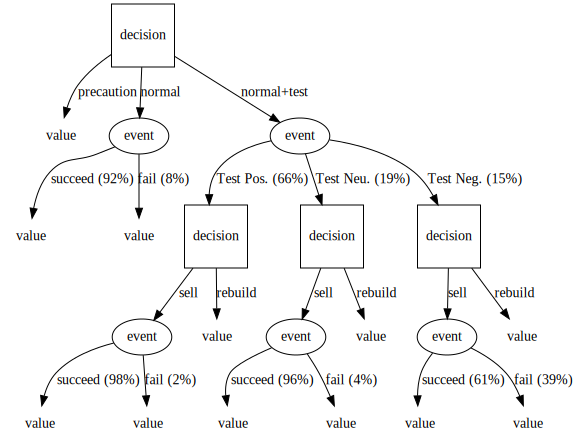

In [30]:
tree=buildTree()
tree.graph(False)

We can solve the tree as follows.

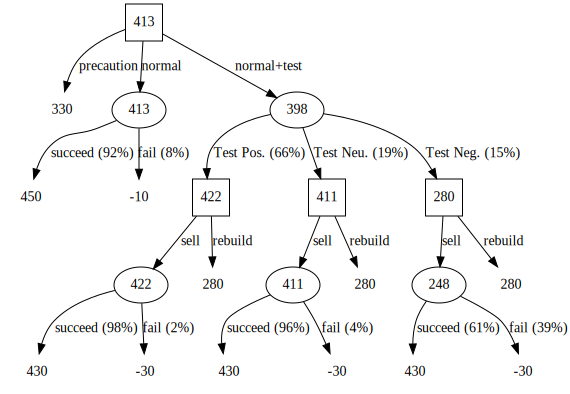

In [31]:
tree.graph(True)

The optimal decision as seen above is to go through the Normal branch and do not apply the test. This is because the test is not accurate enough to be worth it, and taking the precaution is too costly and the probability of failure is so low that it's okay to risk it. 

## Sensitivity Analysis

Once we do the heavy lifting of creating the code for decision trees (which we can reuse later) and for building the particular tree for the Graphic Corporation case, we can now examine if the optimal decision will change if certain parameters change. 

For example, what if the G-lan is less reliable than we thought. What if it failed with 15 percent probability intead?


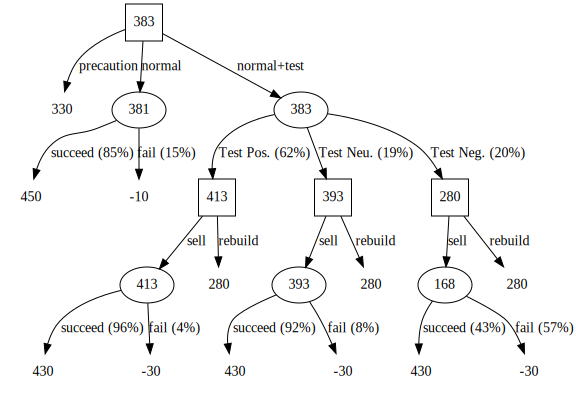

In [32]:
okay=.85

pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1

pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

revenue=1050
baseCost=600
precautionCost=720
rebuildCost=150
reinstallCost=210
testCost=20
failCost=100

buildTree().graph()


The optimal solution is now to build normally and test. A similar answer is obtained if G-lan were at the same failure rate of 8 percent, but the test were more accurate. 

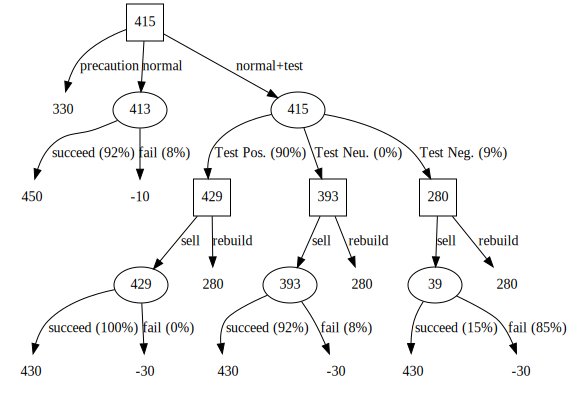

In [33]:
okay=.92
pos_when_okay=.98
neu_when_okay=.005
neg_when_okay=.015
pos_when_fail=.015
neu_when_fail=.005
neg_when_fail=.98

buildTree().graph()

Now, what if the failure rate and test accuracy were as before, but the cost of failure to the reputation of the company is more like 300K rather than 100K?

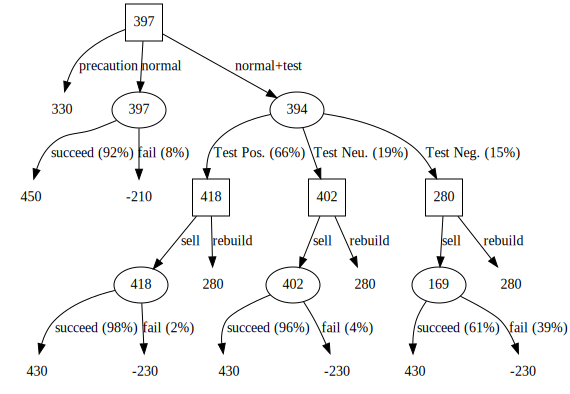

In [34]:
okay=.92
pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1
pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

failCost=300
buildTree().graph()

The optimal solution is still to build as normal, and not to take the precaution. This shows that our original decision is relatively **robust** to the assumption on the failure cost, so that even if the estimate is wrong by a bit, our decision is still right. To illustrate this further, let us plot the profit for each of the three top-level decisions given a range of failure costs.

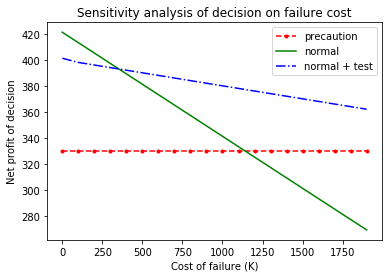

In [35]:
import matplotlib.pyplot as plt
failureCost=range(0,2000,100)
precaution=[]
normal=[]
normalTest=[]
for cost in failureCost:
    failCost=cost
    tree=buildTree()
    precautionNode,normalNode,normalTestNode=tree.children
    precaution.append(precautionNode.evaluate())
    normal.append(normalNode.evaluate())
    normalTest.append(normalTestNode.evaluate())
plt.plot(failureCost,precaution,'r--.',label='precaution')
plt.plot(failureCost,normal,'g',label='normal')
plt.plot(failureCost,normalTest,'b-.',label='normal + test')
plt.legend()
plt.title('Sensitivity analysis of decision on failure cost')
plt.ylabel('Net profit of decision')
plt.xlabel('Cost of failure (K)')
plt.show()
   

As can be seen, when the cost of failure is low, it is safe to build as normal. If it is higher (above 400K or so), it is better to test. Even if the failure cost is around 2M instead of 100K, it is still not worth it to build with precaution.